# Examining the water balance components

In [1]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import gdal
import netCDF4 as nc

%run plot_and_table_functions.py

This notebook uses techniques that may not scale up well to larger problems; specifically, this this may fail with more timesteps or larger grids owing the fact that grids for *all* simulation days and *all* gridcells are read into memory. However, this technique is convenient for showing the contents of the various output grids and for performing simple manipulations of those grids. Users who develop better techniques are encouraged to contact the authors so that we might share them with other SWB 2.0 users.

In [2]:
def create_file_reference( component_name ):
    '''
    This is a simple convenience function that will form a path and filename to a
    given water budget component
    '''
    # specify the prefix, path to SWB2 output, timeframe, and resolution
    output_path = '../output/'
    prefix      = 'central_sands_'
    start_year  = '2012'
    end_year    = '2013'
    ncol        = '300'
    nrow        = '150'
    return( output_path + prefix + component_name + '_' + start_year + '_' 
          + end_year + '__' + nrow + '_by_' + ncol + '.nc' )

SWB version 2.0 currently writes all components of the water balance to NetCDF files. Each water balance component is written to a separate file.

    output/central_sands_actual_et_2012_2013__150_by_300.nc
    output/central_sands_crop_et_2012_2013__150_by_300.nc
    output/central_sands_gdd_2012_2013__150_by_300.nc
    output/central_sands_gross_precipitation_2012_2013__150_by_300.nc
    output/central_sands_infiltration_2012_2013__150_by_300.nc
    output/central_sands_interception_2012_2013__150_by_300.nc
    output/central_sands_irrigation_2012_2013__150_by_300.nc
    output/central_sands_net_infiltration_2012_2013__150_by_300.nc
    output/central_sands_rainfall_2012_2013__150_by_300.nc
    output/central_sands_reference_ET0_2012_2013__150_by_300.nc
    output/central_sands_rejected_net_infiltration_2012_2013__150_by_300.nc
    output/central_sands_runoff_2012_2013__150_by_300.nc
    output/central_sands_runoff_outside_2012_2013__150_by_300.nc
    output/central_sands_runon_2012_2013__150_by_300.nc
    output/central_sands_snow_storage_2012_2013__150_by_300.nc
    output/central_sands_snowfall_2012_2013__150_by_300.nc
    output/central_sands_snowmelt_2012_2013__150_by_300.nc
    output/central_sands_soil_storage_2012_2013__150_by_300.nc
    output/central_sands_delta_soil_storage_2012_2013__150_by_300.nc
    output/central_sands_tmax_2012_2013__150_by_300.nc
    output/central_sands_tmin_2012_2013__150_by_300.nc

In [3]:
fname_lu = '../output/Landuse_land_cover__as_read_into_SWB.asc'
dataset_lu = gdal.Open( fname_lu )
if dataset_lu is None:
    print('Could not open landuse grid')
    quit
lu = dataset_lu.ReadAsArray()
lu = ma.masked_where( lu <= 0, lu )
lu_vals=np.unique( lu.flatten() )

# Define the pathname to the SWB landuse lookup table
fname_lu_table = '../std_input/Landuse_lookup_CDL.txt'    
lu_table = pd.read_table( fname_lu_table )    

In [4]:
net_infil           = nc.Dataset( create_file_reference( 'net_infiltration' ) )
irrigation          = nc.Dataset( create_file_reference( 'irrigation' ) )
rainfall            = nc.Dataset( create_file_reference( 'rainfall') )
runoff              = nc.Dataset( create_file_reference( 'runoff' ) )
runon               = nc.Dataset( create_file_reference( 'runon' ) )
snowmelt            = nc.Dataset( create_file_reference( 'snowmelt') )
actual_et           = nc.Dataset( create_file_reference( 'actual_et') )
soil_moisture       = nc.Dataset( create_file_reference( 'soil_storage') )
delta_soil_moisture = nc.Dataset( create_file_reference( 'delta_soil_storage') )
interception        = nc.Dataset( create_file_reference( 'interception') )

rejected_net_infiltration  = nc.Dataset( create_file_reference( 'rejected_net_infiltration') )

In [5]:
net_infil_vals_nc  = net_infil.variables[ 'net_infiltration' ]
irrigation_vals_nc = irrigation.variables[ 'irrigation' ]
rainfall_vals_nc   = rainfall.variables[ 'rainfall' ]
runoff_vals_nc     = runoff.variables[ 'runoff' ]
runon_vals_nc      = runon.variables[ 'runon' ]
snowmelt_vals_nc   = snowmelt.variables[ 'snowmelt' ]
actual_et_vals_nc  = actual_et.variables[ 'actual_et' ]
soil_moist_vals_nc = soil_moisture.variables[ 'soil_storage' ]
delta_soil_moist_vals_nc = delta_soil_moisture.variables[ 'delta_soil_storage' ]
interception_vals_nc = interception.variables[ 'interception' ]

rejected_net_infil_vals_nc = rejected_net_infiltration.variables[ 'rejected_net_infiltration' ]

x_vals_nc          = net_infil.variables[ 'x' ]
y_vals_nc          = net_infil.variables[ 'y' ]

The variable 'net_infil_vals_nc' now contains all of the daily values written by SWB 2.0 for the 'net_infiltration' variable. 'x_vals_nc' and 'y_vals_nc' contain the projected x and y coordinates associated with the 'net_infiltration' grid output. Some basic information about this variable may be obtained by entering the variable name at the command line.

In [6]:
# create a numpy masked array from the netcdf variable values
net_infil_vals    = ma.masked_where( np.isnan( net_infil_vals_nc ), net_infil_vals_nc ) 
irrigation_vals   = ma.masked_where( np.isnan( irrigation_vals_nc ), irrigation_vals_nc ) 
rainfall_vals     = ma.masked_where( np.isnan( rainfall_vals_nc ), rainfall_vals_nc ) 
runoff_vals       = ma.masked_where( np.isnan( runoff_vals_nc ), runoff_vals_nc ) 
runon_vals        = ma.masked_where( np.isnan( runon_vals_nc ), runon_vals_nc ) 
snowmelt_vals     = ma.masked_where( np.isnan( snowmelt_vals_nc ), snowmelt_vals_nc ) 
actual_et_vals    = ma.masked_where( np.isnan( actual_et_vals_nc ), actual_et_vals_nc ) 
interception_vals = ma.masked_where( np.isnan( interception_vals_nc ), interception_vals_nc ) 
delta_soil_moist_vals  = ma.masked_where( np.isnan( delta_soil_moist_vals_nc ), delta_soil_moist_vals_nc )
soil_moist_vals   = ma.masked_where( np.isnan( soil_moist_vals_nc ), soil_moist_vals_nc ) 

rejected_net_infil_vals   = ma.masked_where( np.isnan( rejected_net_infil_vals_nc ), rejected_net_infil_vals_nc ) 

x_vals = np.array( x_vals_nc )
y_vals = np.array( y_vals_nc )

On a cell-by-cell basis, the mass balance may be written:

$$\theta_{t} = \theta_{t-1} + rainfall + snowmelt + irrigation + runon - interception - runoff - actual\:et - net\:infiltration - rejected\:net\:infiltration$$
$$0 = (\theta_{t-1}-\theta_{t}) + rainfall + snowmelt + irrigation + runon - interception - runoff - actual\:et - net\:infiltration - rejected\:net\:infiltration$$

The equation above will be valid for true soil cells, but will not be valid for open water cells; the actual ET for open water cells is set to the reference ET0 value and excess water is placed in the 'runoff_outside' variable.

In [31]:
mass_balance = rainfall_vals + snowmelt_vals + irrigation_vals + runon_vals + delta_soil_moist_vals - interception_vals - actual_et_vals - runoff_vals - net_infil_vals - rejected_net_infil_vals

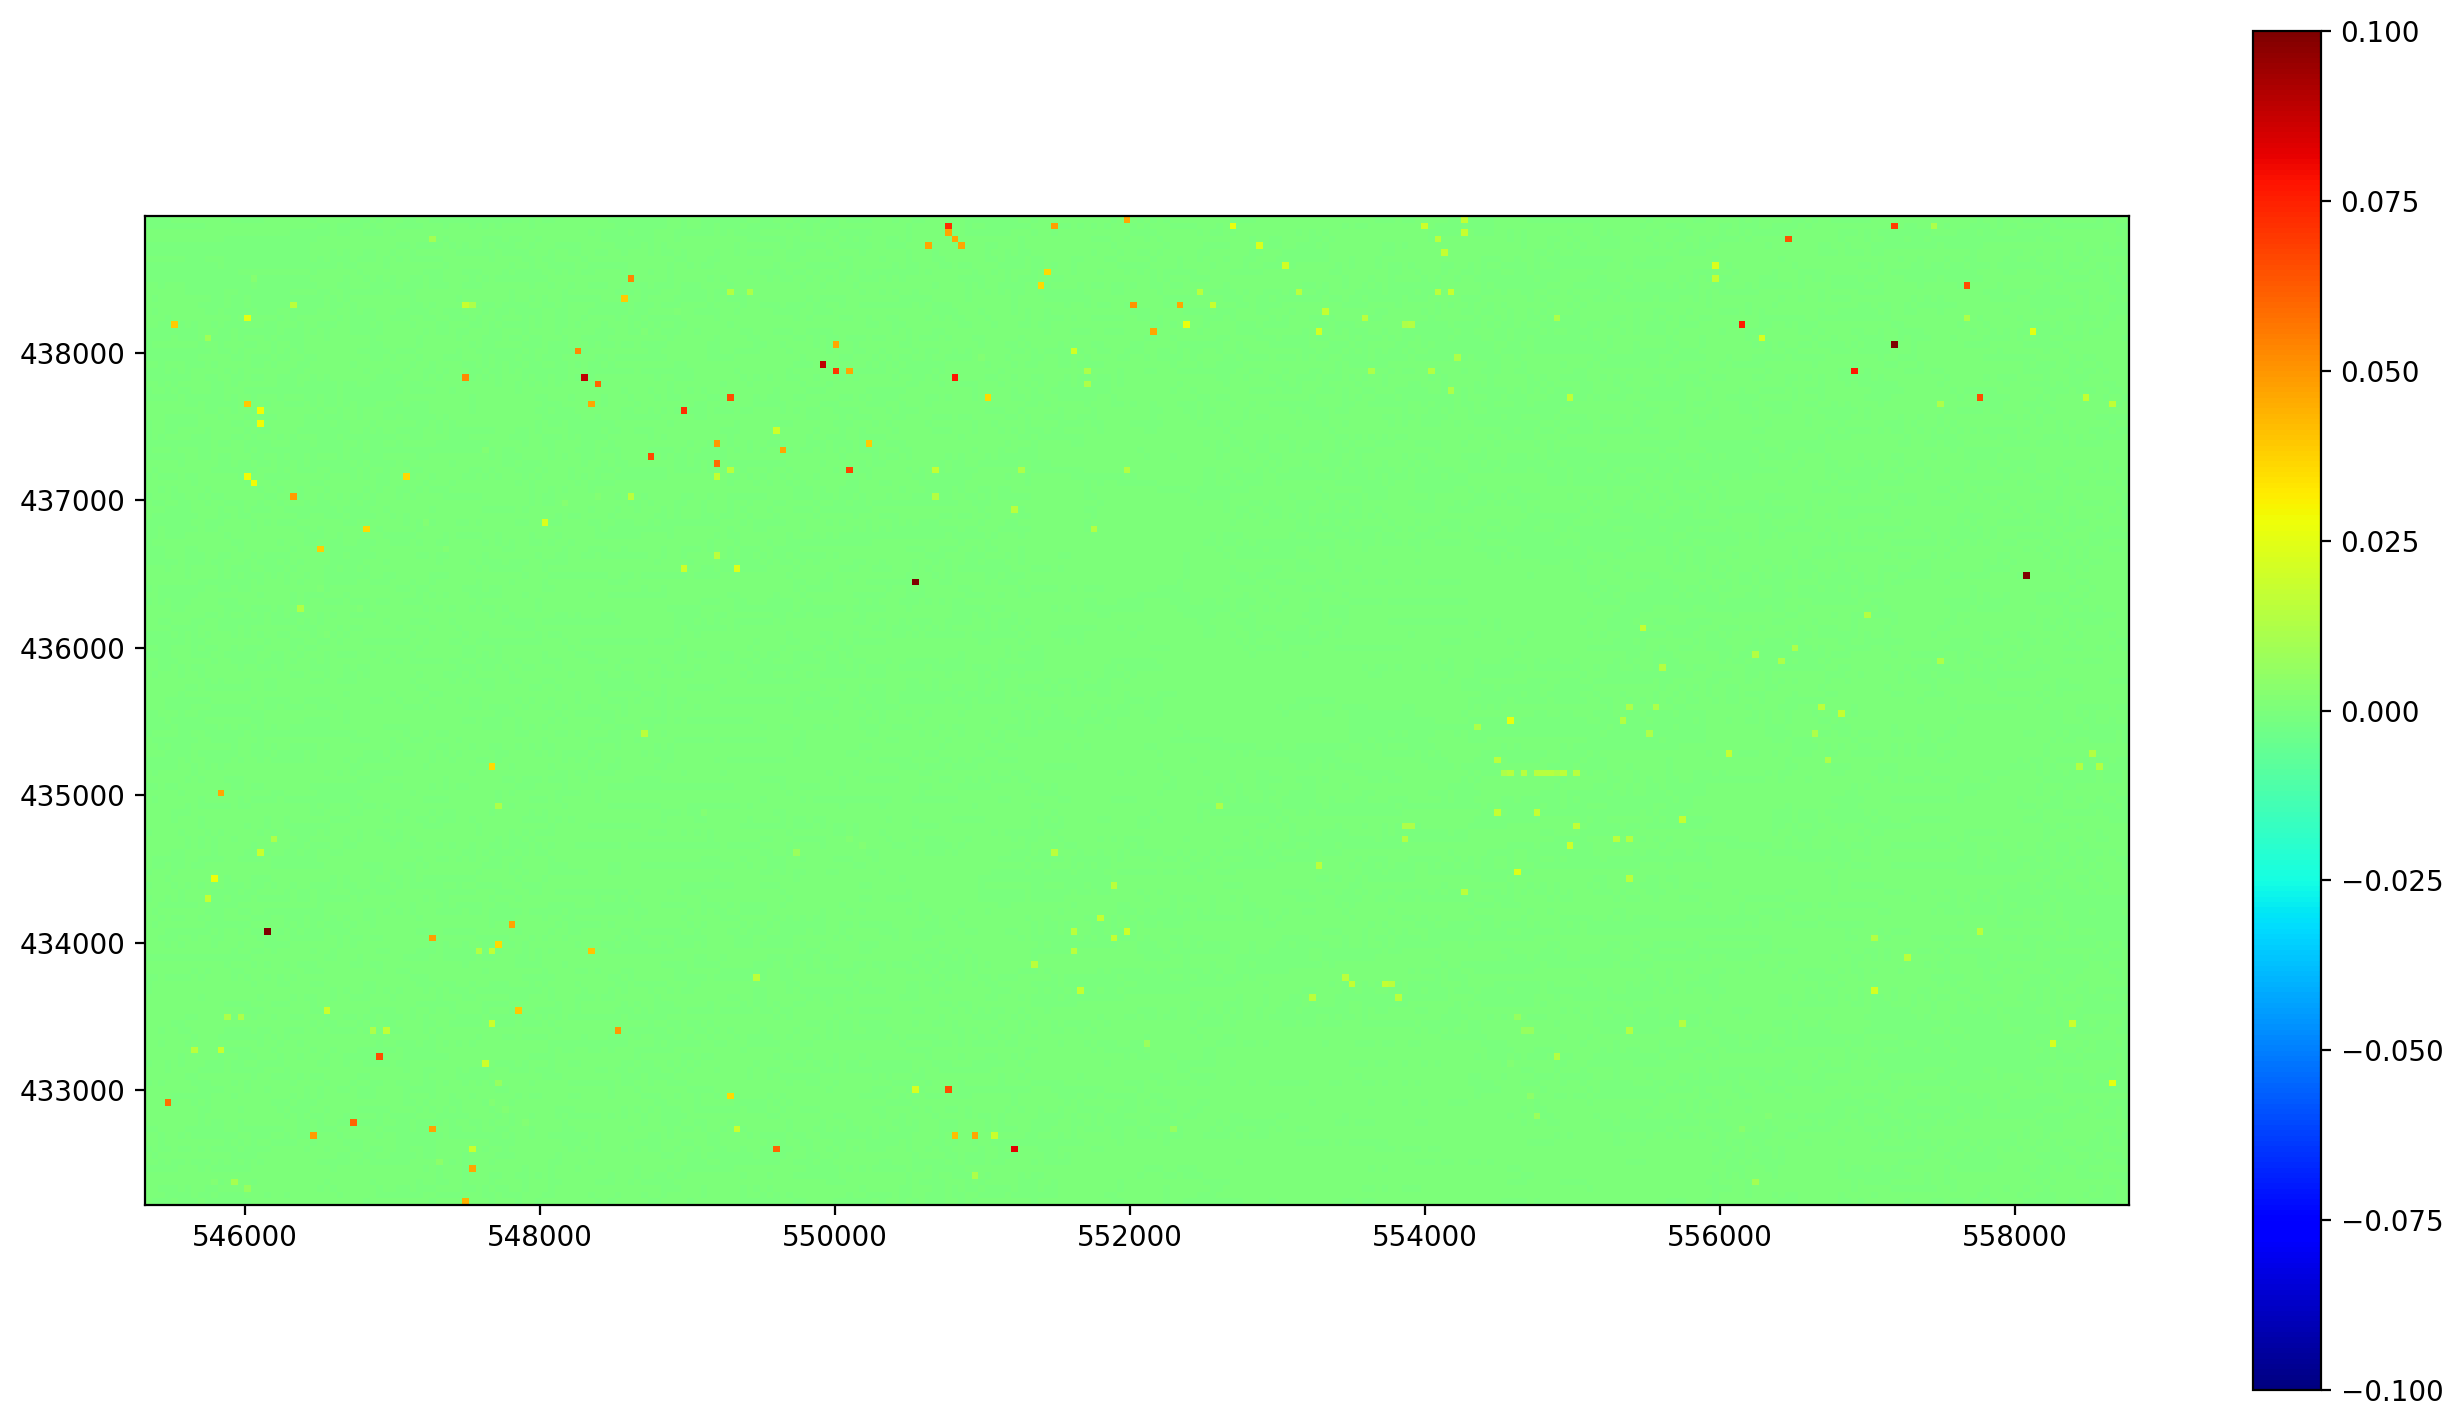

In [33]:
make_plot( x=x_vals, y=y_vals, var=mass_balance[6,:,:], minz=-0.1, maxz=0.1)

In [21]:
np.where( mass_balance[71,:,:]>0.02 )

(array([], dtype=int64), array([], dtype=int64))

In [35]:
daynum = 6
np.unique(lu)
lu_descriptions=lu_table['Description']
lu_lookup_values=lu_table['LU_Code']
make_comparison_table( x=actual_et_vals[daynum,:,:], y=mass_balance[daynum,:,:], factor=lu, 
                       description=lu_descriptions,
                       lookup_vals=lu_lookup_values,
                       xlab='Mean actual ET', ylab='Mean mass_balance',
                       calc_difference=False )

,Code,Description,Count,Mean actual ET,Mean mass_balance
0,1,Corn,5132,0.024,0.000
1,4,Sorghum,8,0.025,0.000
2,5,Soybeans,1523,0.027,0.000
3,12,Sweet Corn,10023,0.024,0.000
4,23,Spring Wheat,4,0.029,0.000
5,24,Winter Wheat,29,0.029,0.000
6,27,Rye,249,0.026,0.000
7,28,Oats,174,0.029,0.000
8,29,Millet,1,0.025,0.000
9,36,Alfalfa,1297,0.024,0.000


In [11]:
# add up the grids for all 731 days in the simulation; divide by the number of years in the
# simulation to obtain the net infiltration sums on a mean annual basis
net_infil_sum          = net_infil_vals.sum(axis=0) / 2.0
irrigation_sum         = irrigation_vals.sum(axis=0) / 2.0
rainfall_sum           = rainfall_vals.sum(axis=0) / 2.0
runoff_sum             = runoff_vals.sum(axis=0) / 2.0
runon_sum              = runon_vals.sum(axis=0) / 2.0
snowmelt_sum           = snowmelt_vals.sum(axis=0) / 2.0
actual_et_sum          = actual_et_vals.sum(axis=0) / 2.0
rejected_net_infil_sum = rejected_net_infil_vals.sum(axis=0) / 2.0 

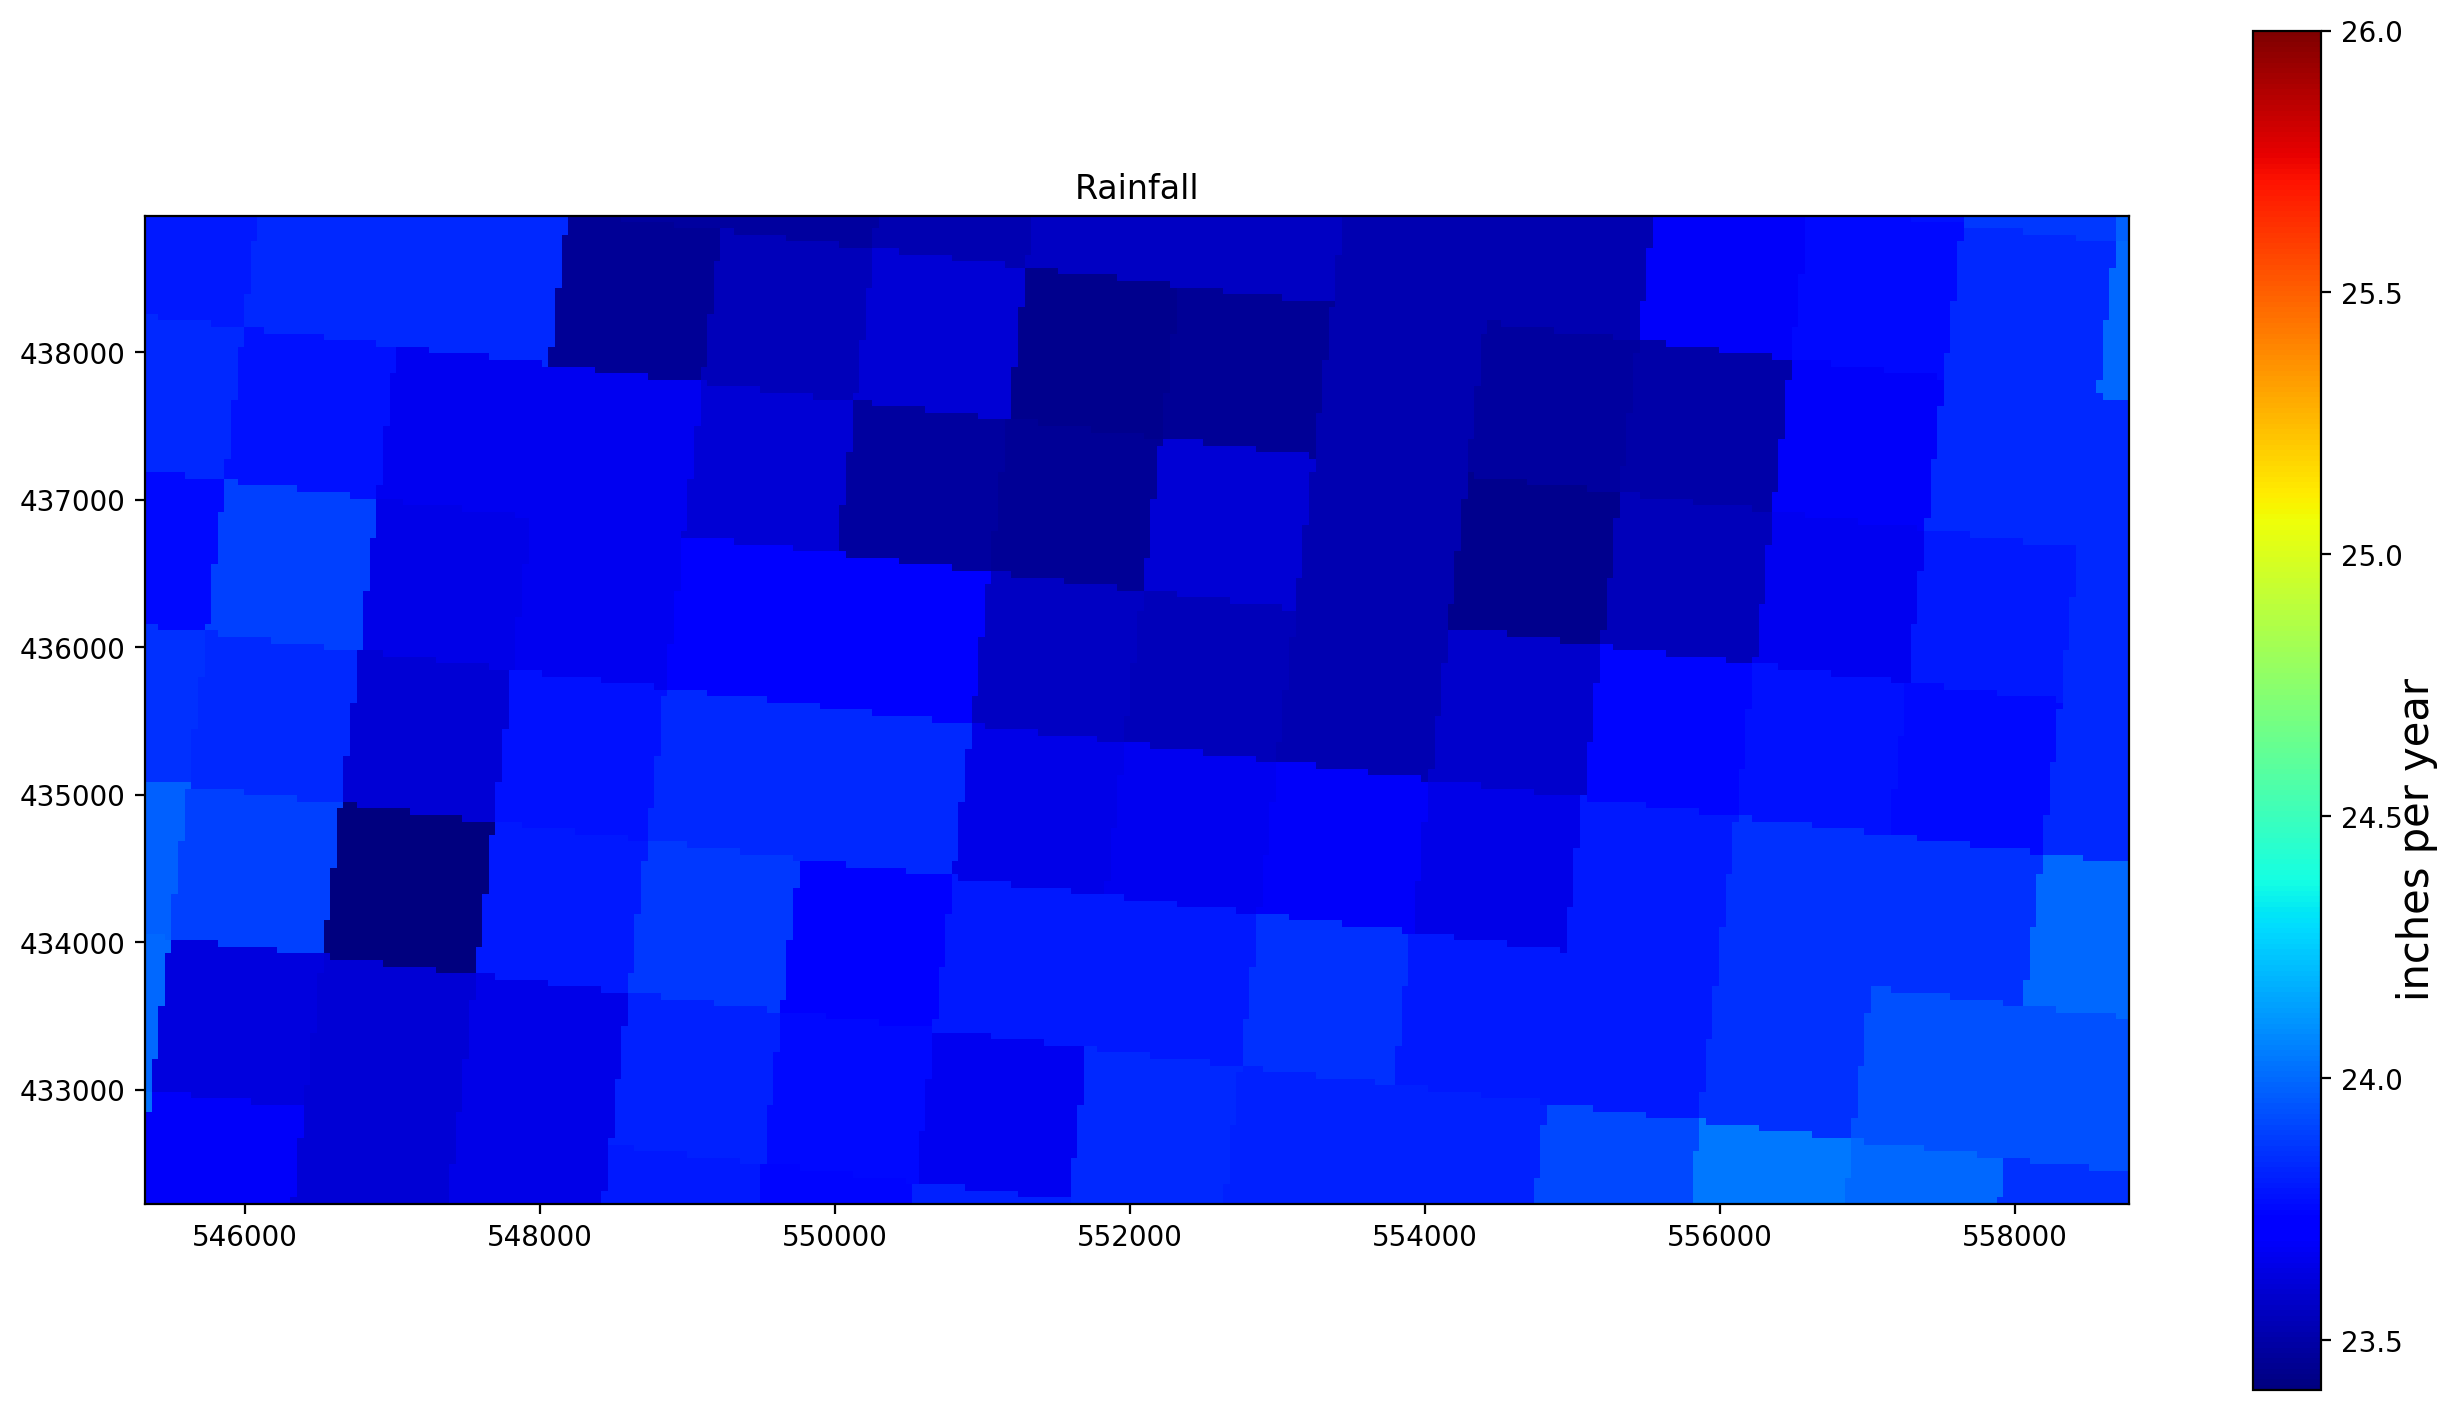

In [12]:
make_plot( x=x_vals, y=y_vals, var=rainfall_sum, maxz=26., title="Rainfall", barlabel="inches per year" )

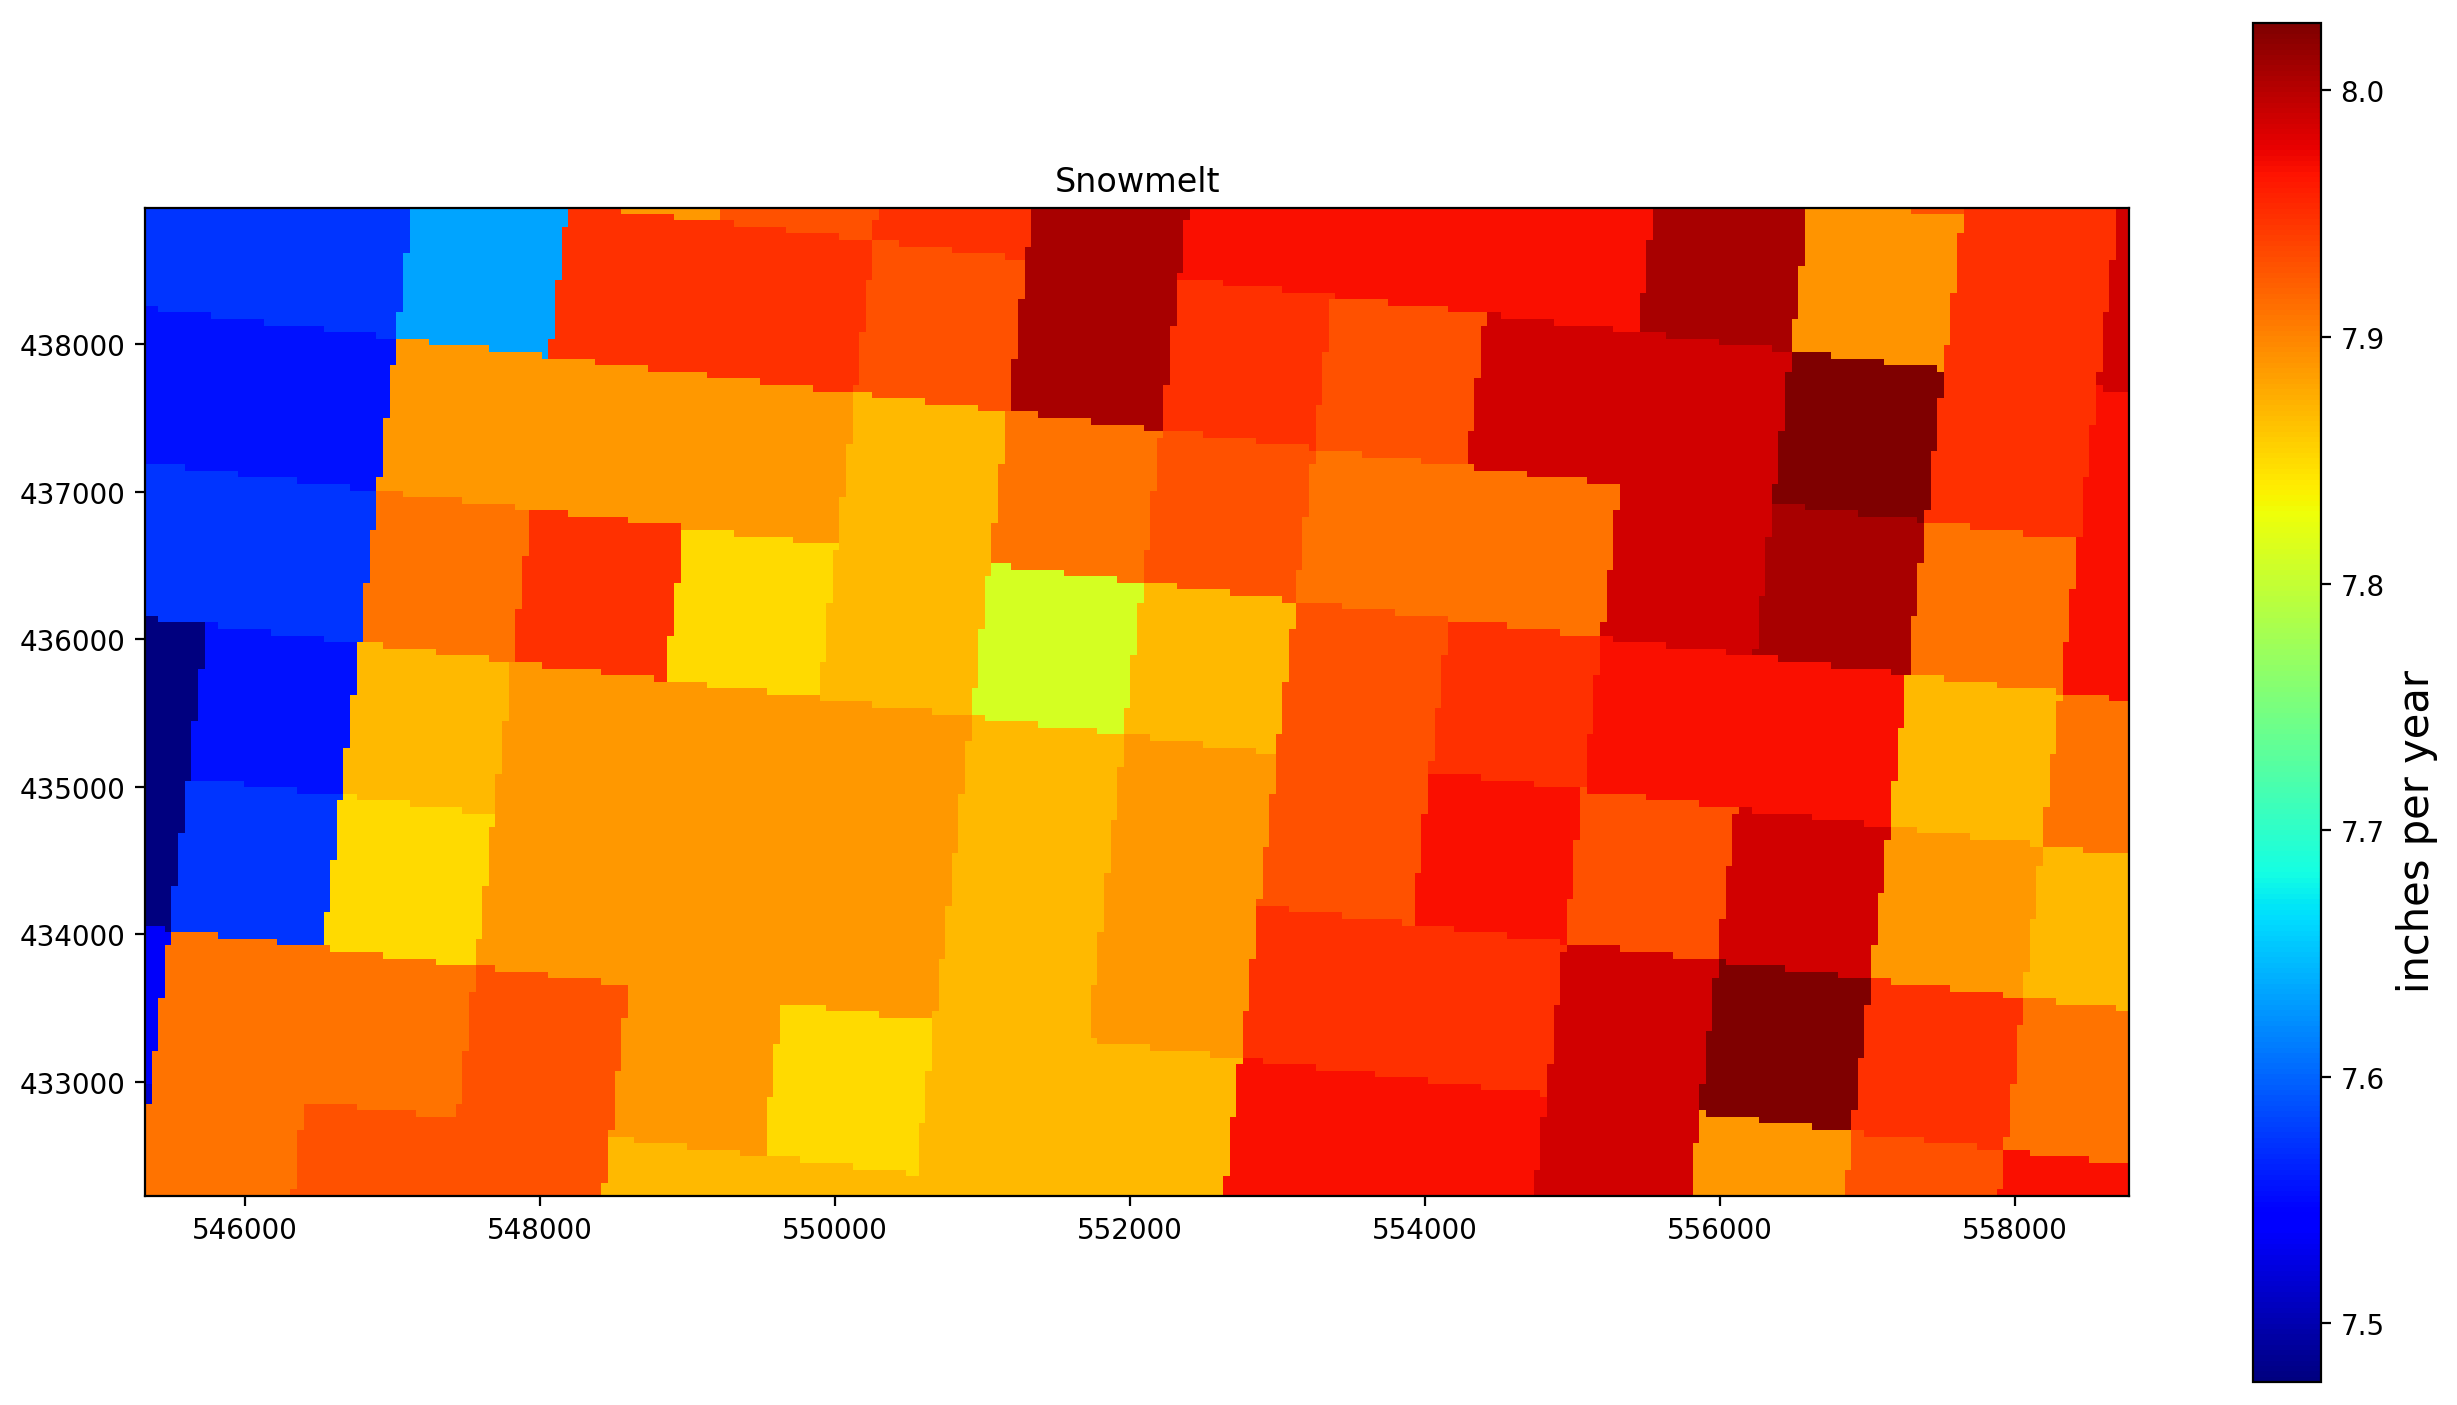

In [13]:
make_plot( x=x_vals, y=y_vals, var=snowmelt_sum, title="Snowmelt", barlabel="inches per year" )

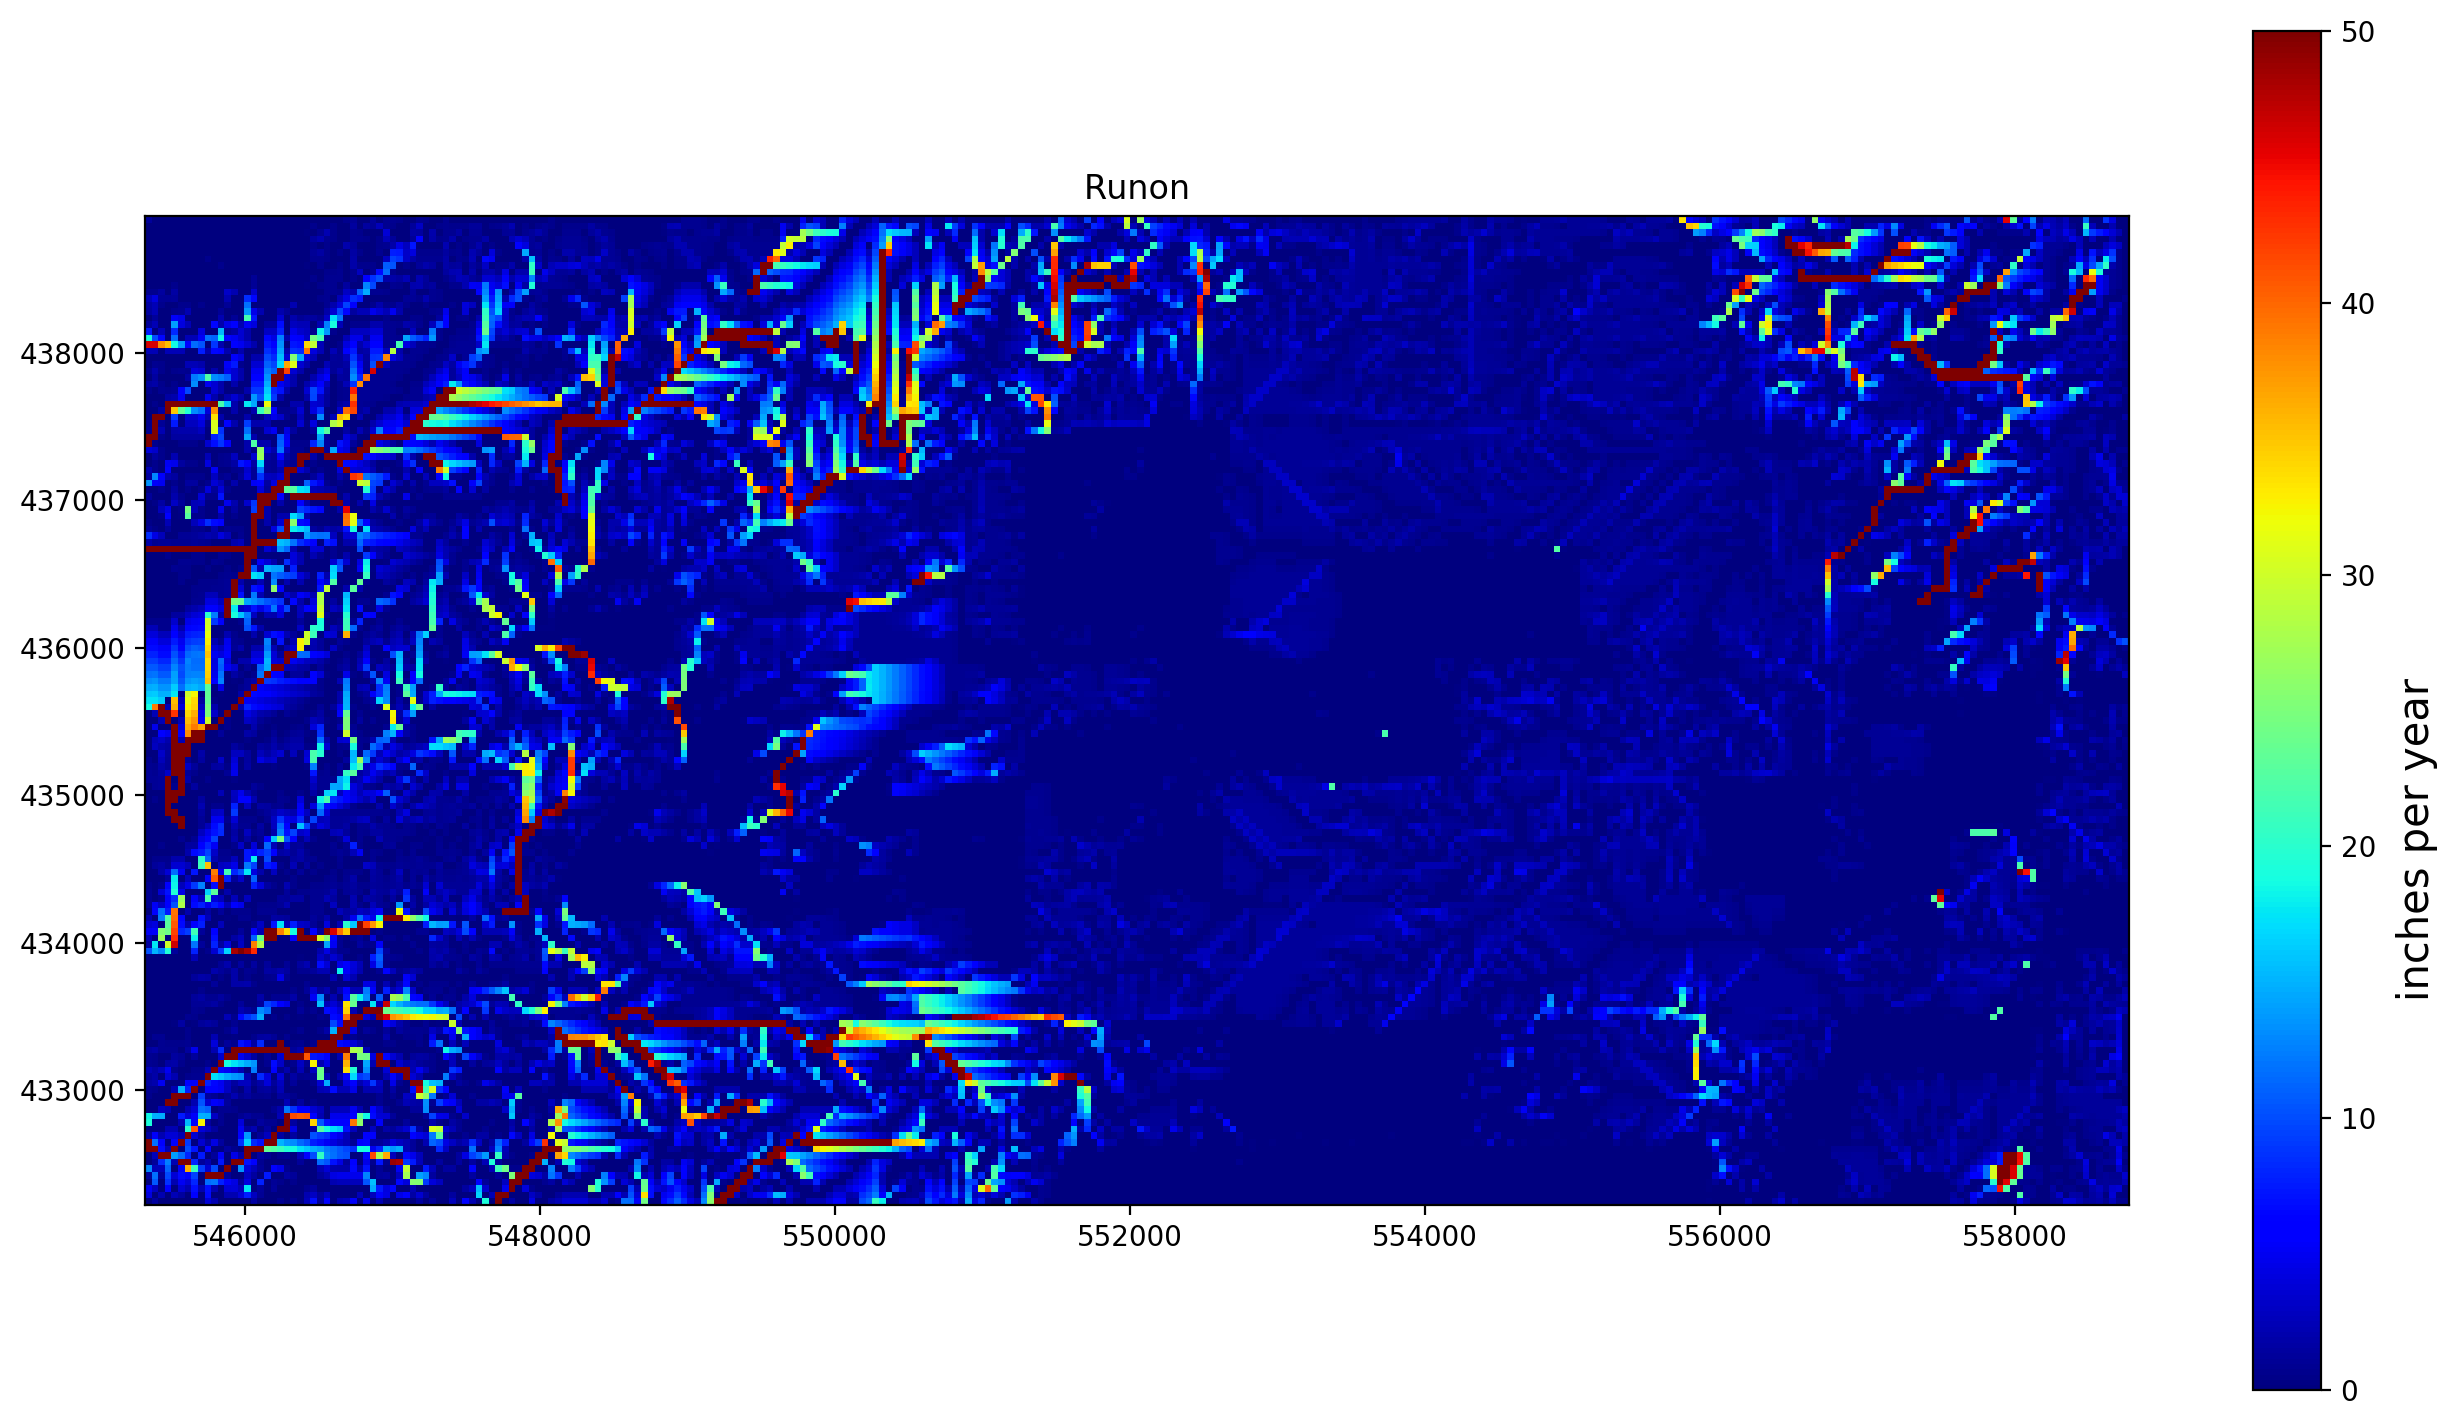

In [14]:
make_plot( x=x_vals, y=y_vals, var=runon_sum, maxz=50., title="Runon", barlabel="inches per year" )

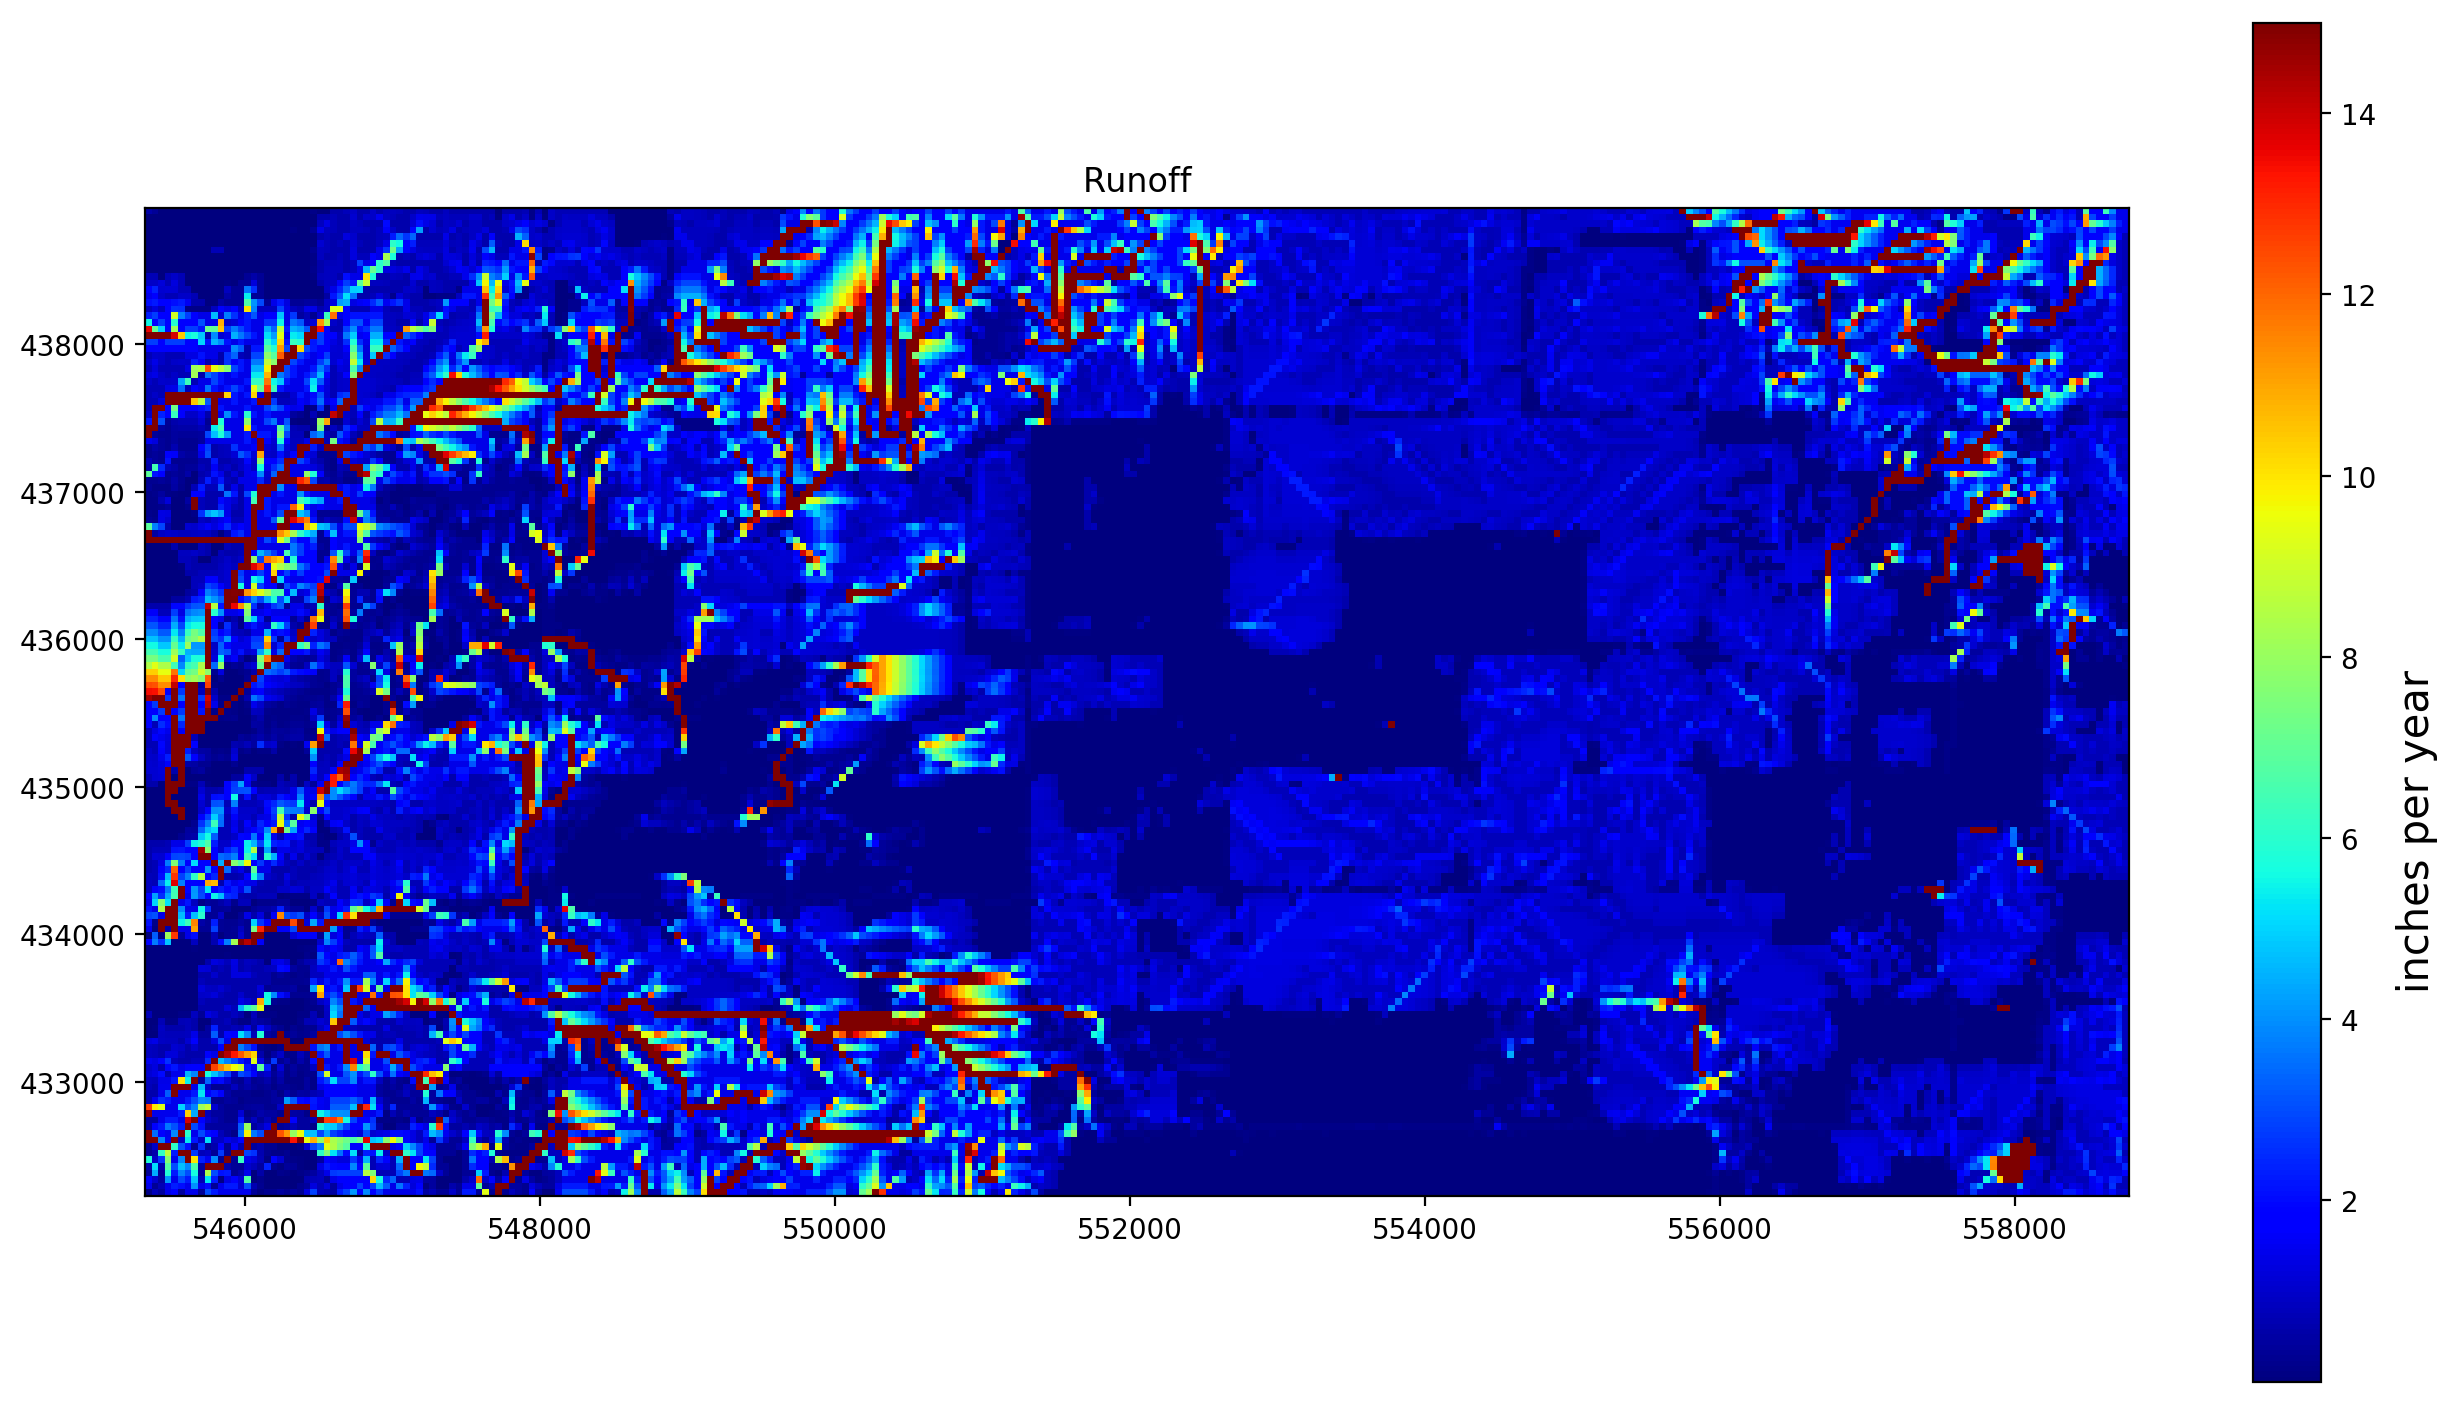

In [15]:
make_plot( x=x_vals, y=y_vals, var=runoff_sum, maxz=15., title="Runoff", barlabel="inches per year" )

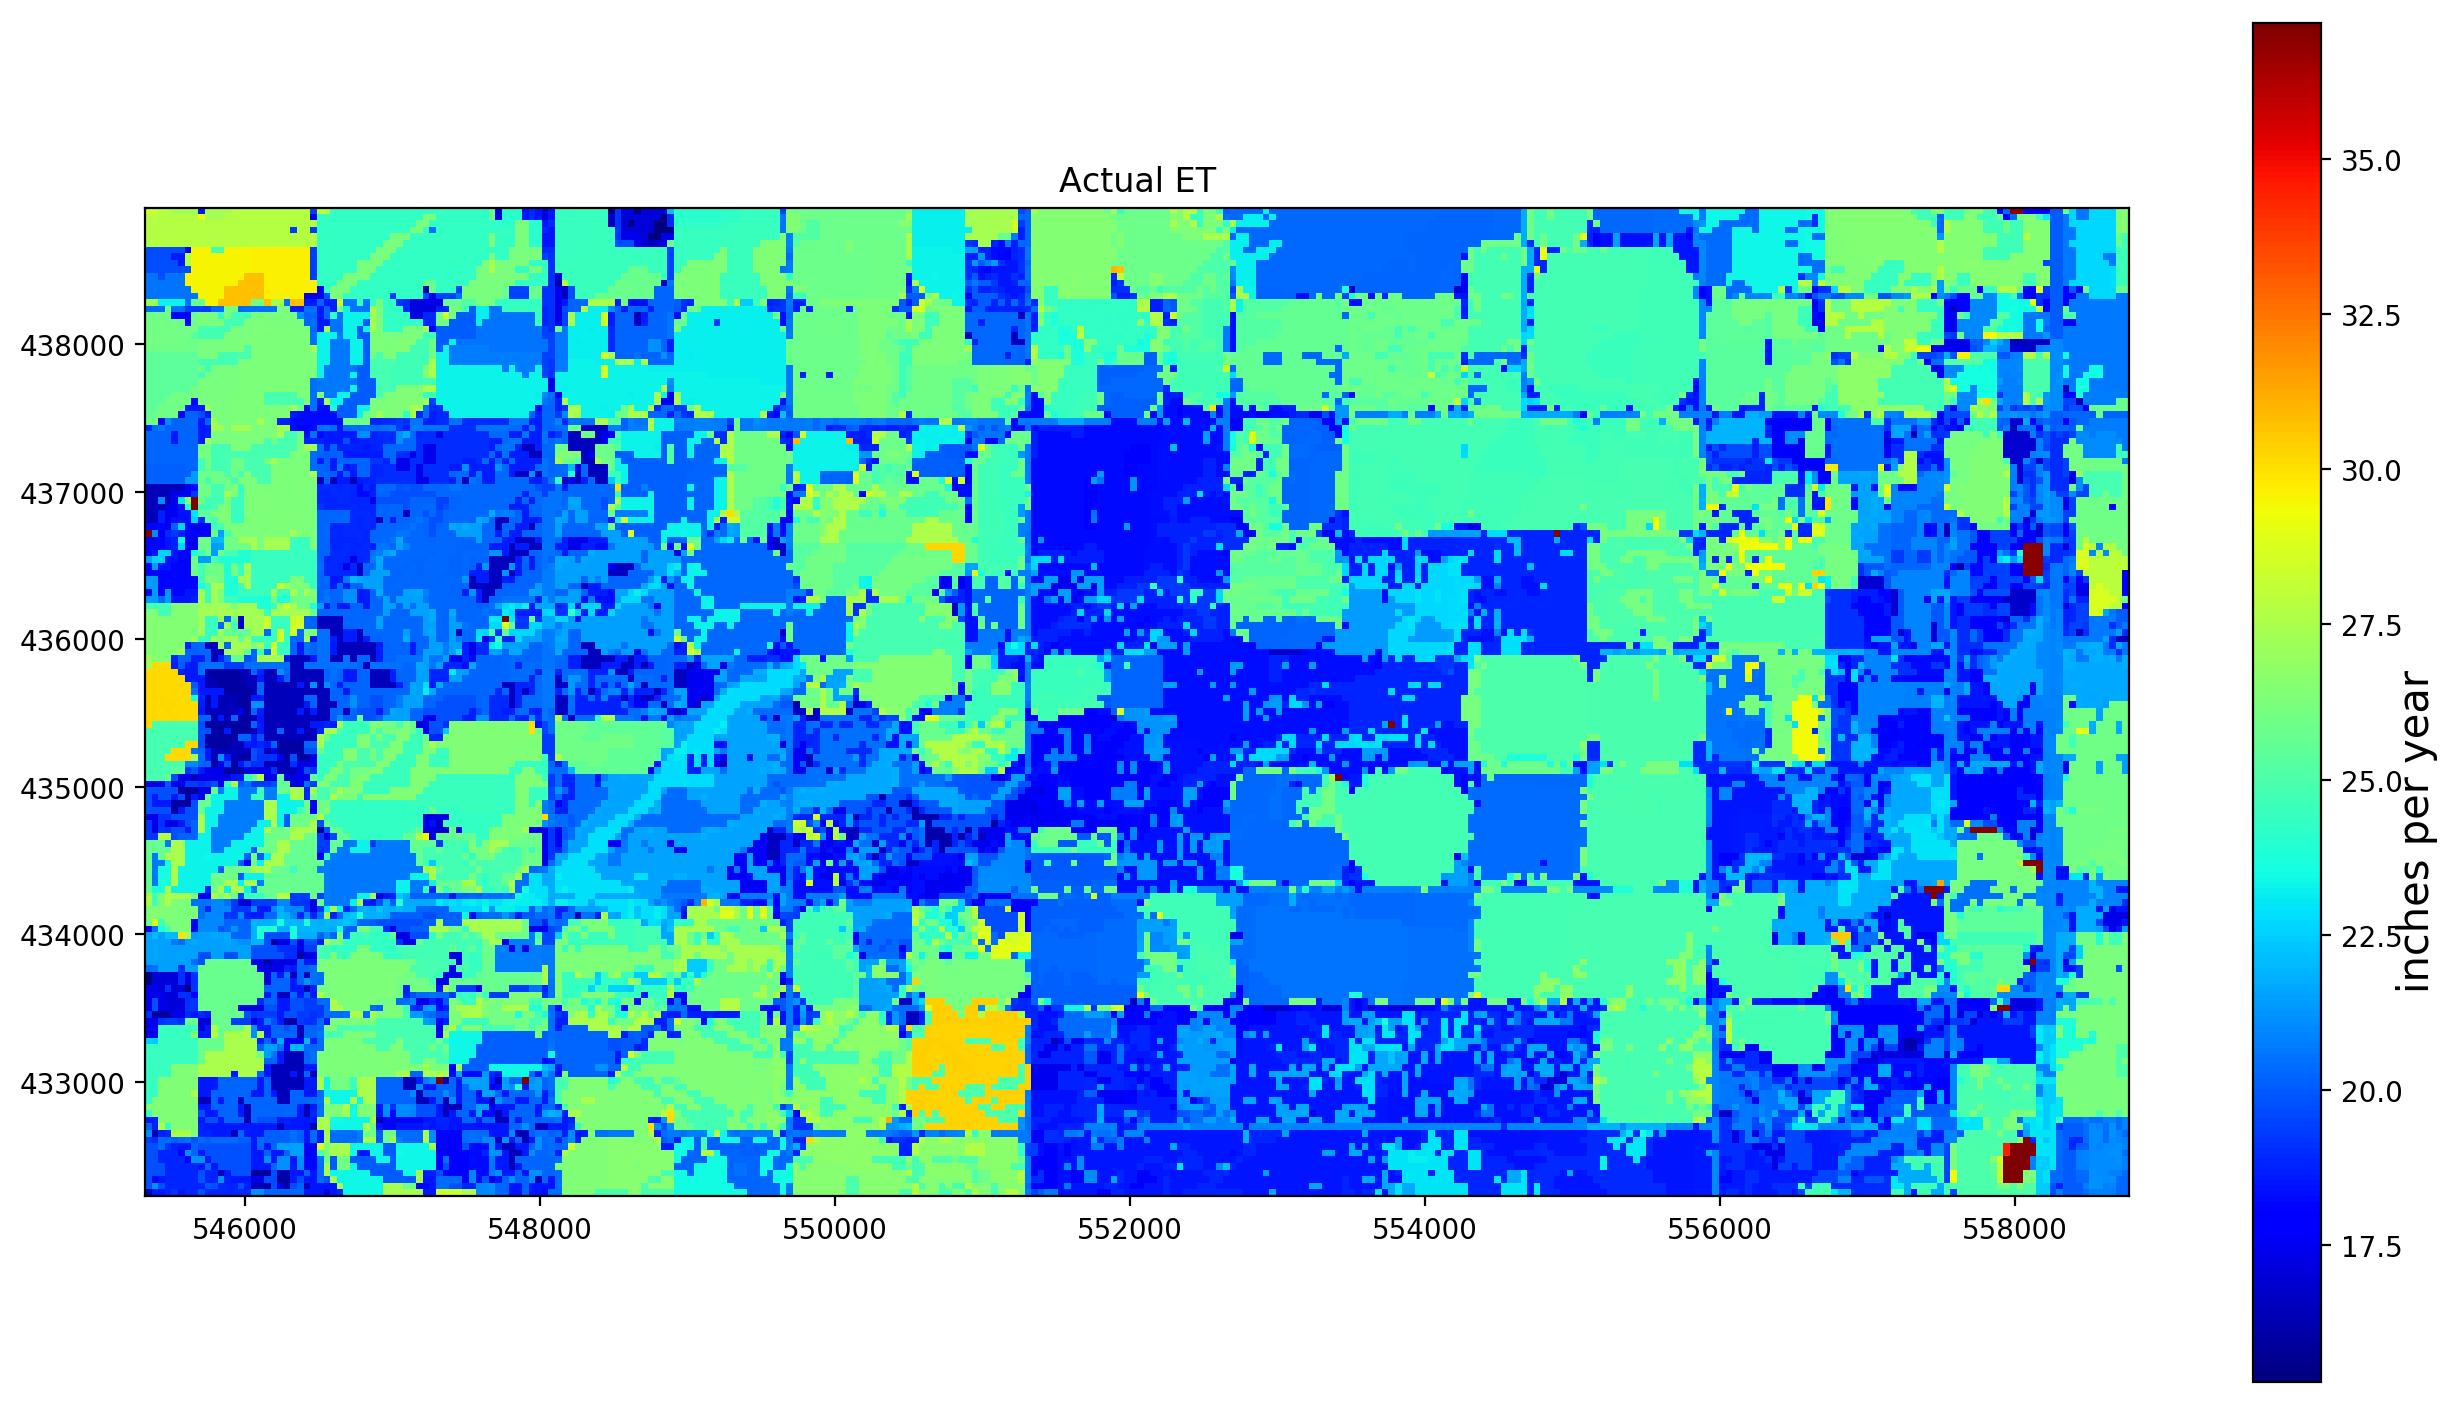

In [16]:
make_plot( x=x_vals, y=y_vals, var=actual_et_sum, title="Actual ET", barlabel="inches per year" )

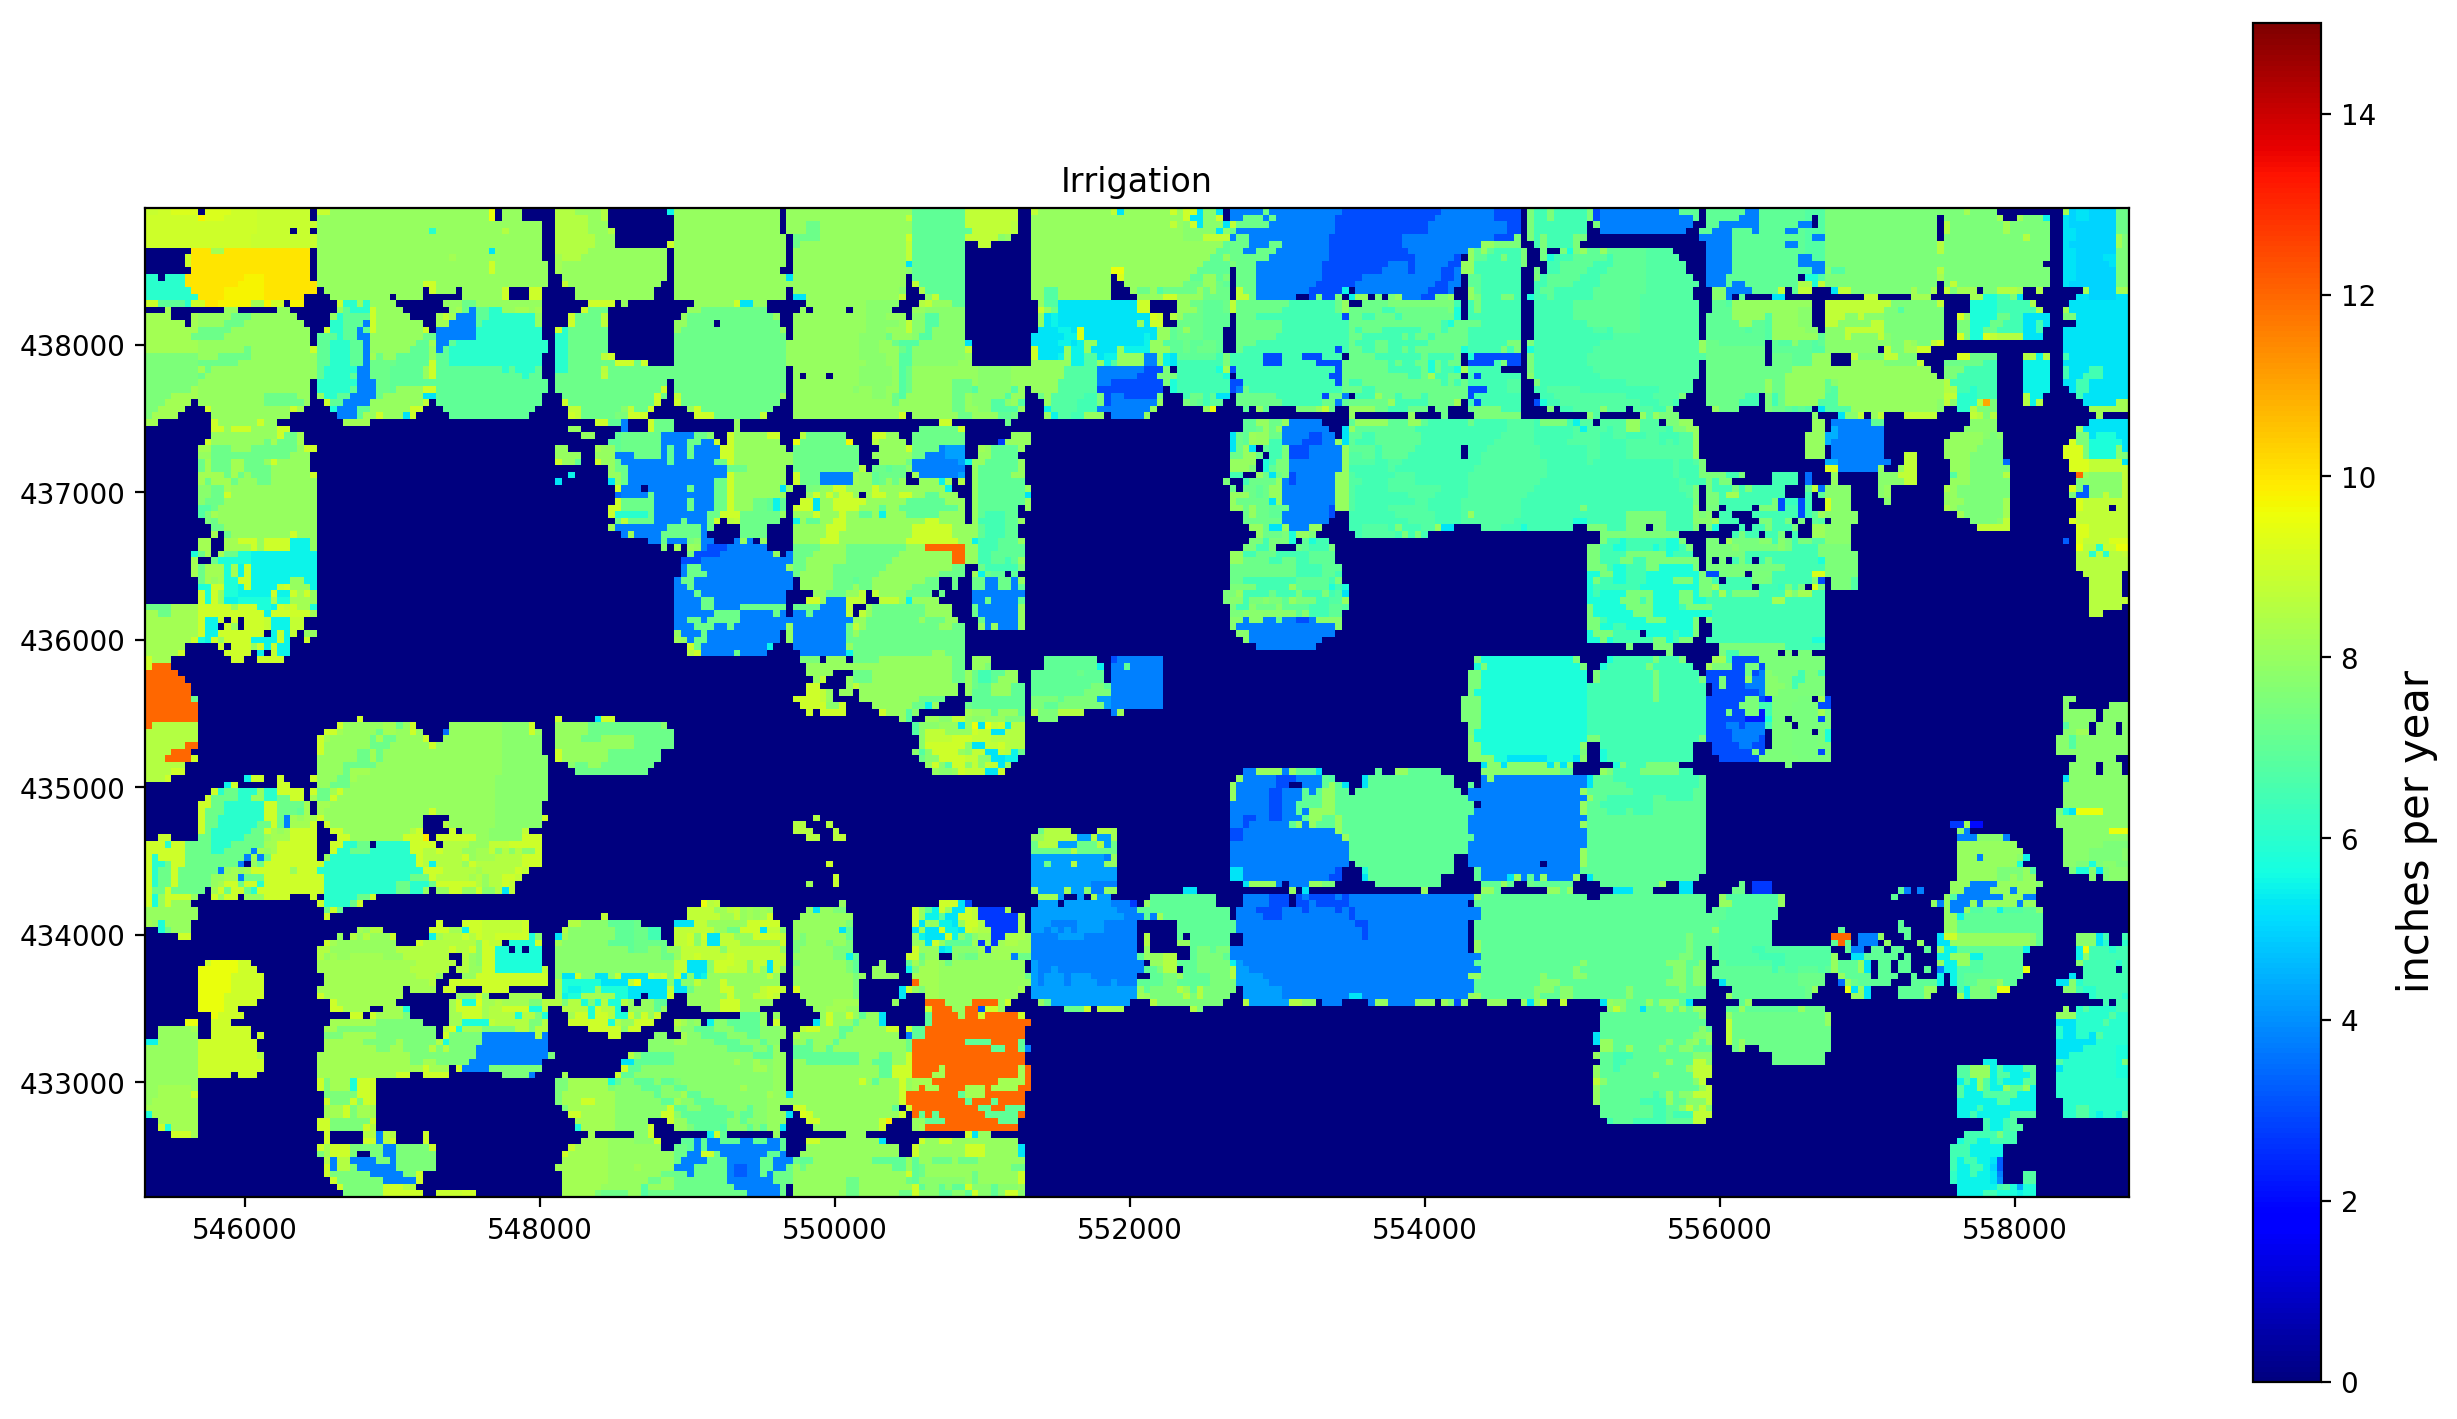

In [17]:
make_plot( x=x_vals, y=y_vals, title='Irrigation', barlabel='inches per year', var=irrigation_sum, maxz=15. )

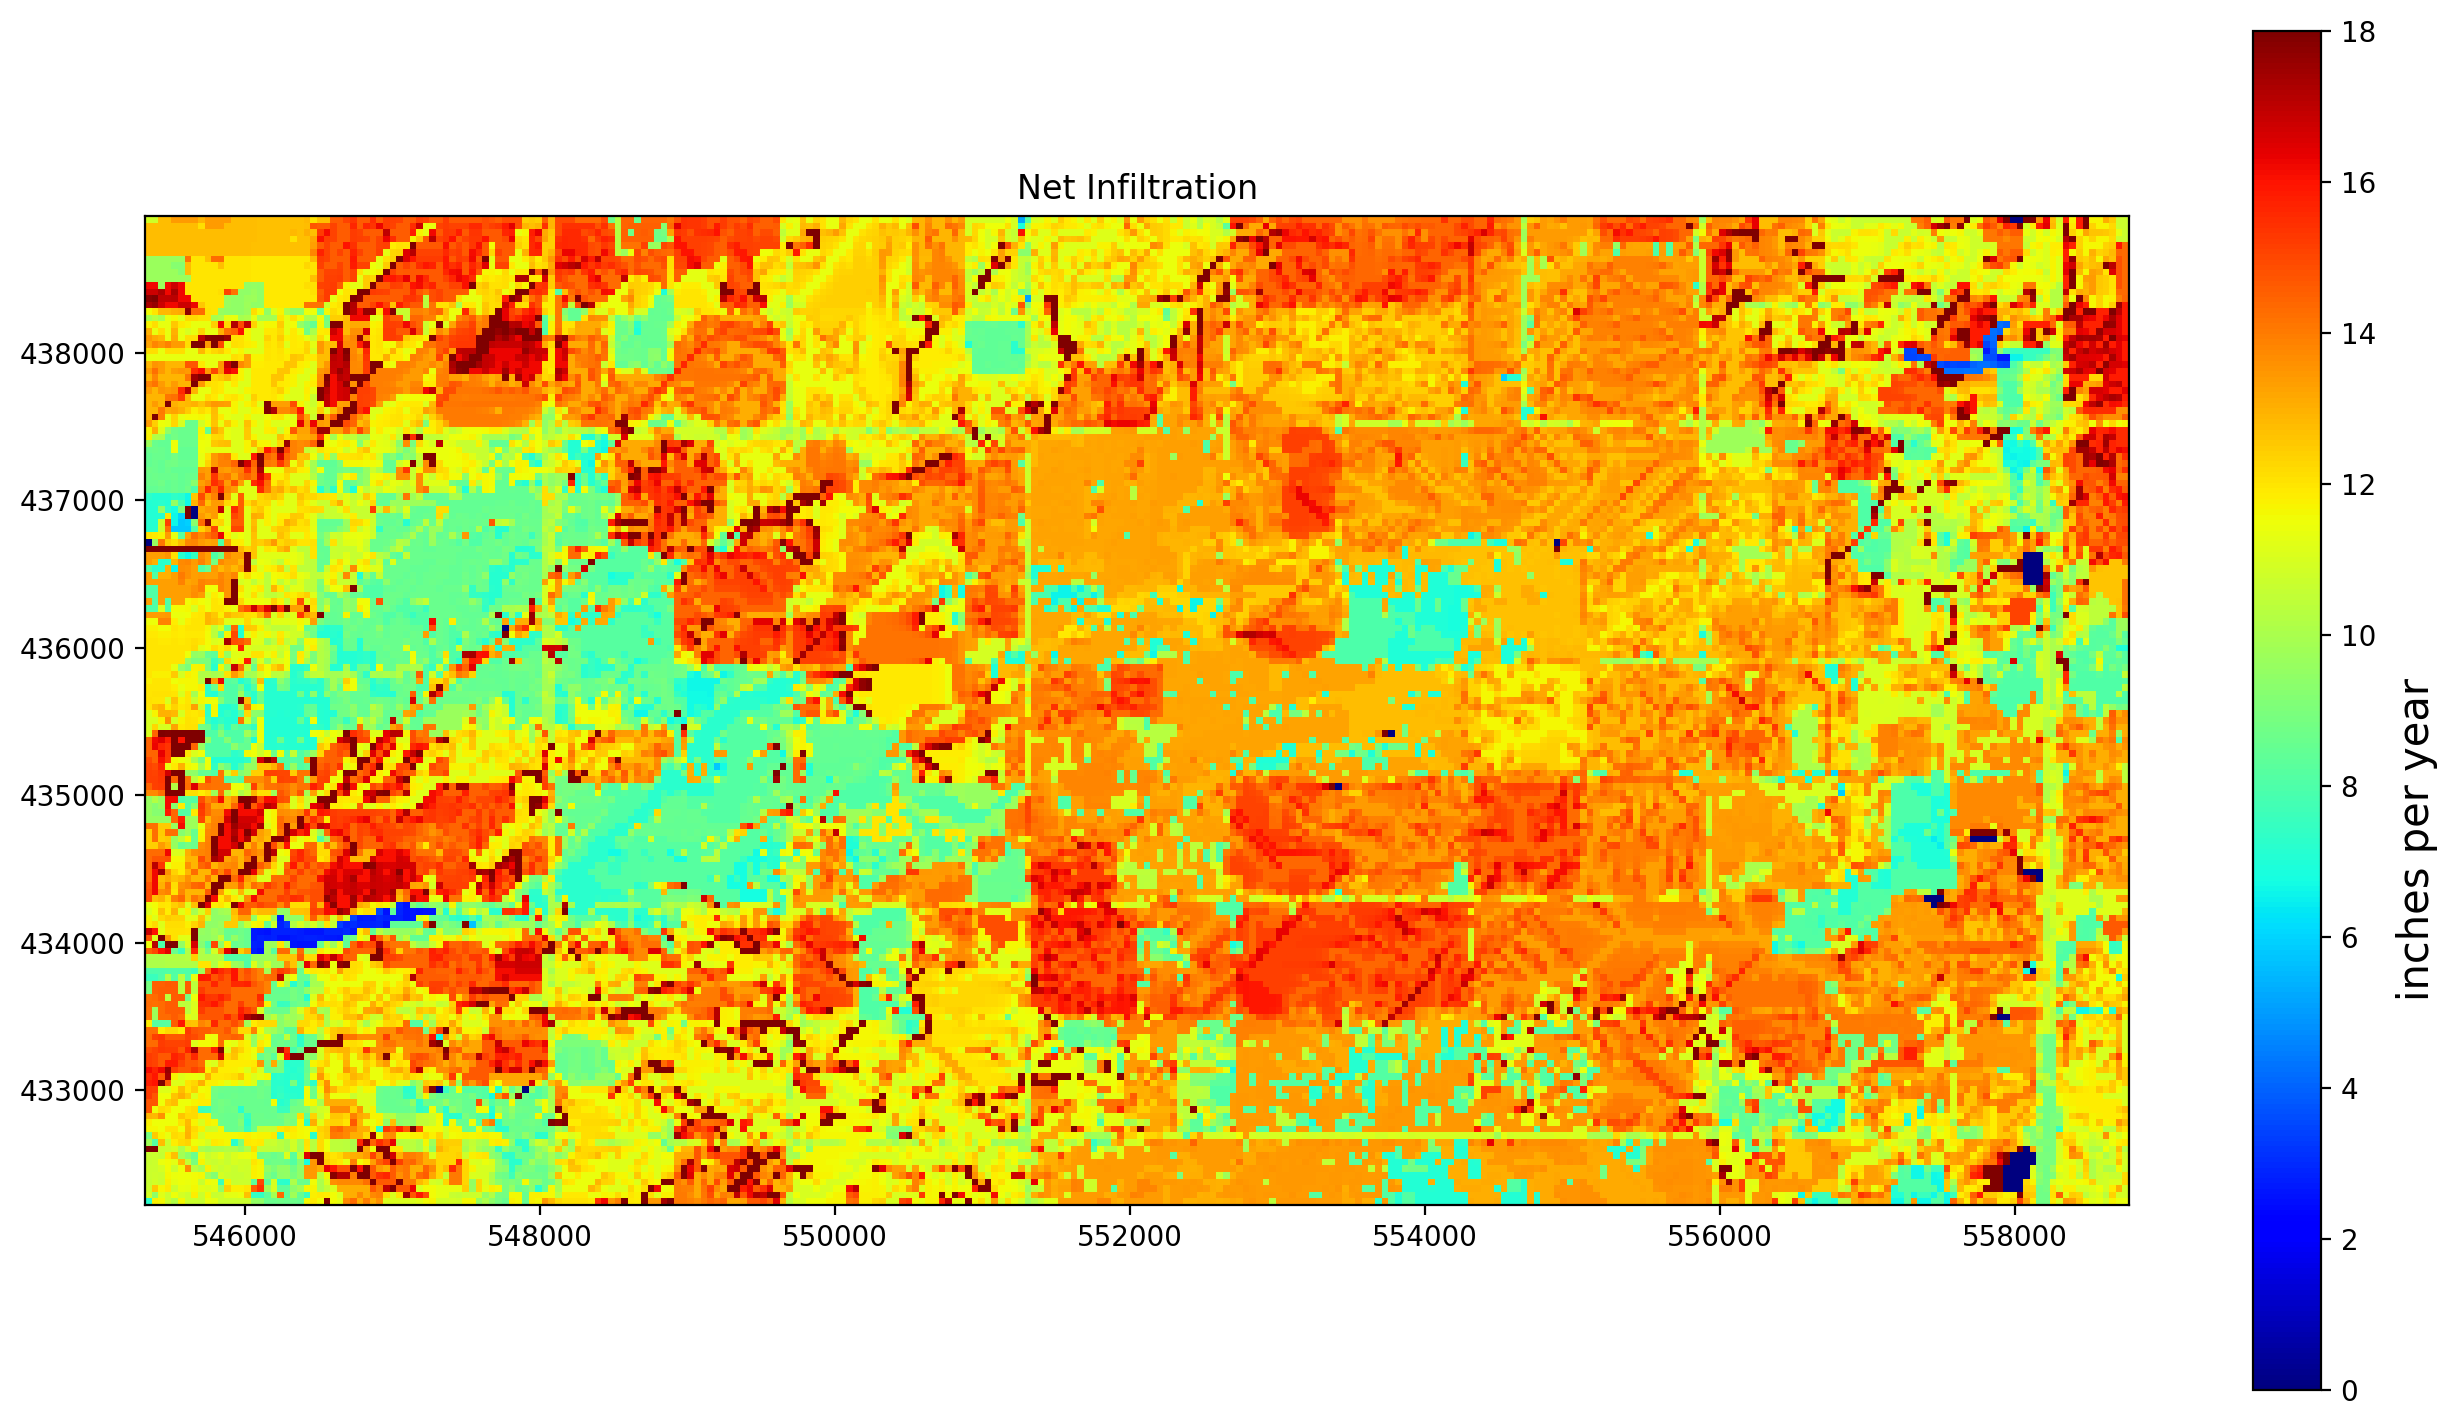

In [18]:
make_plot( x=x_vals, y=y_vals, title='Net Infiltration', barlabel='inches per year', var=net_infil_sum, maxz=18. )

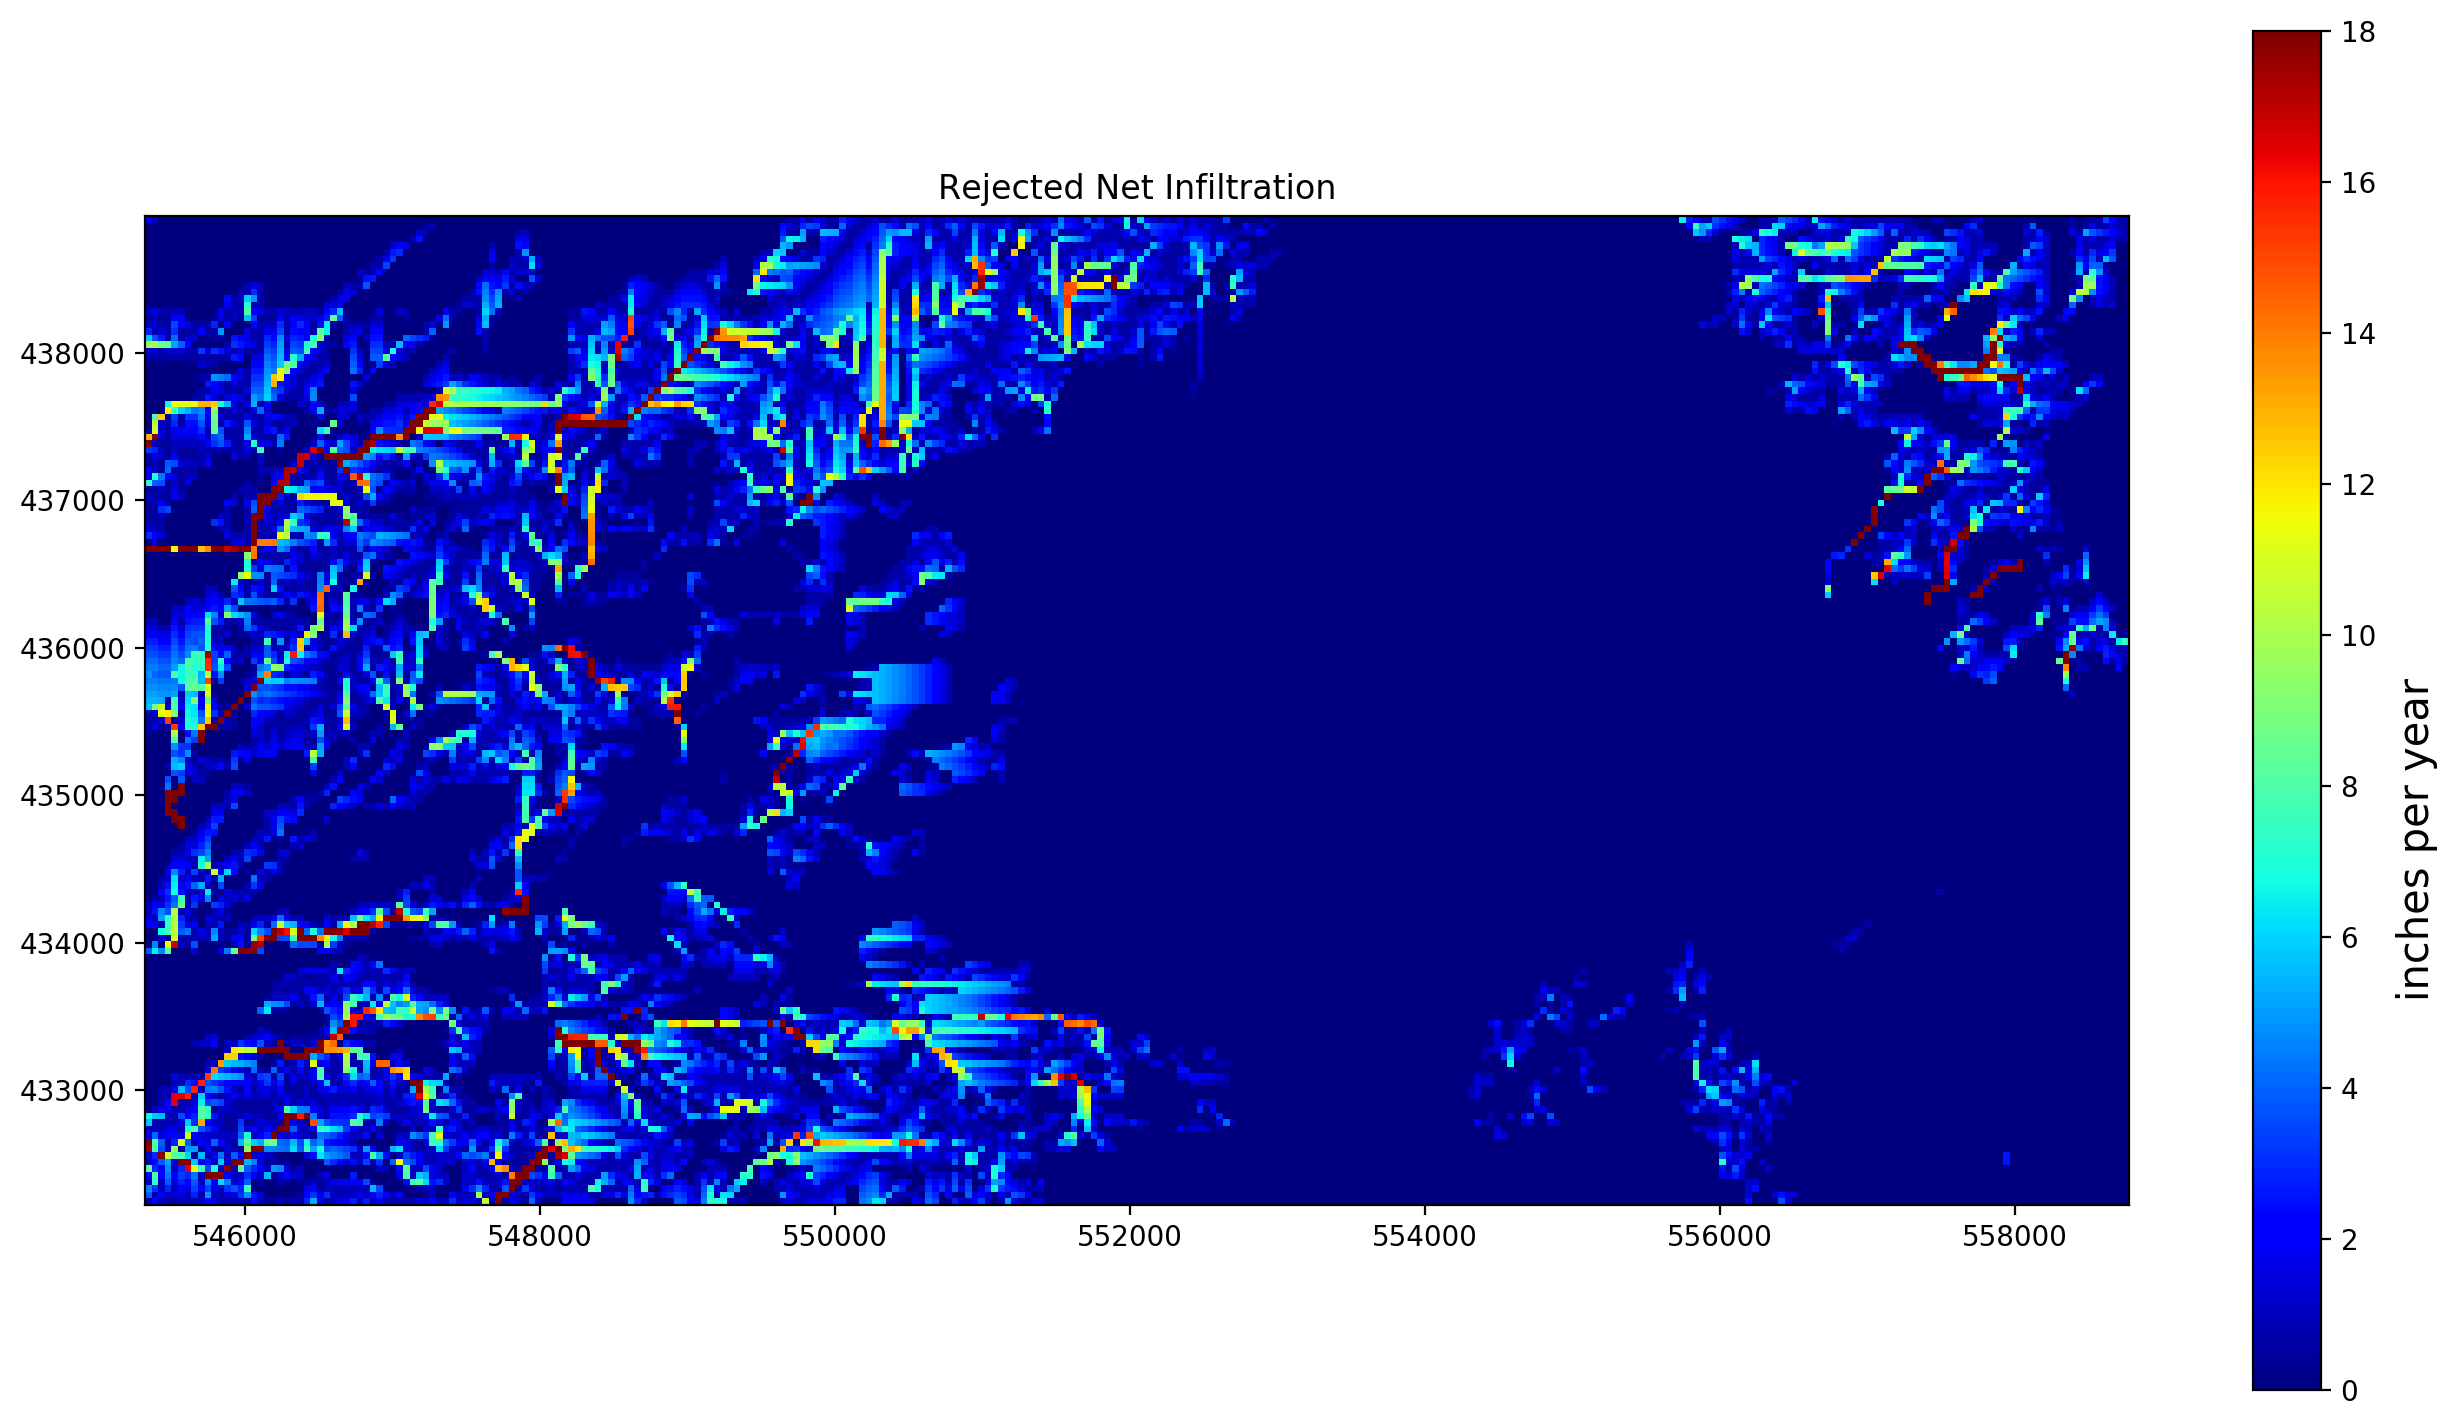

In [19]:
make_plot( x=x_vals, y=y_vals, title='Rejected Net Infiltration', barlabel='inches per year', var=rejected_net_infil_sum, maxz=18. )